In [8]:
import numpy as np
import matplotlib.pylab as plt

In [38]:

def hessian(x):
    """
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

points = np.random.multivariate_normal(mean, cov, size=1000)
print points[0]
x = np.zeros((100,100))
for p in points:
    x[int(p[0]*20)][int(p[1]*20)] = 1.
    
hessian(x).shape

[ 2.38200443  1.85263874]


(2L, 2L, 100L, 100L)

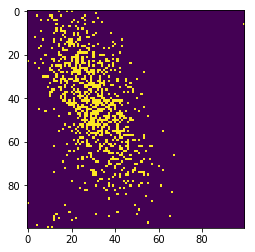

In [47]:

plt.imshow(x)
plt.show()

(1000L, 2L)
(100L,) (100L, 100L)


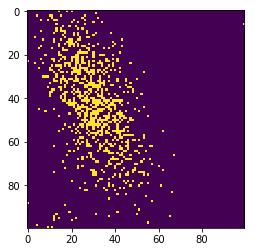

In [52]:
mean = [2.0, 1.5]
cov = [[1.0, 0.3], [0.3, 0.3]]

samples = np.random.multivariate_normal(mean, cov, size=1000)

print samples.shape

cov_counted = np.cov(x.T)
w, v = np.linalg.eig(cov_counted)

print w.shape, v.shape

plt.arrow(mean[0]*20, mean[1]*20, v[0][0]*20, v[1][0]*20)
plt.arrow(mean[0]*20, mean[1]*20, v[0][1]*20, v[1][1]*20)
plt.imshow(x)

plt.show()

In [61]:
a = [[0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 0]]

a = np.array(a)*255

[gx, gy] = np.gradient(a, axis=0)
[gxx, gxy] = np.gradient(gx)
[gxy, gyy] = np.gradient(gy)

print gx

print a
print gx.shape

ValueError: too many values to unpack